<font color='blue'>Привет! Итак, первый модуль почти завершен, проделана огромная работа, приобретено множество новых знаний, проведено не одно интересное исслелование, так держать! Меня зовут Алексей Алексеев, я проверю твой сборный проект и напишу свои комментарии. Они, в зависимости от результата проверки, будут в </font><font color='green'>зеленом (когда все отлично),</font> <font color='brown'>коричневом (когда можно лучше)</font><font color='blue'> или</font> <font color='red'>красном (критичные замечания).</font><font color='blue'> Ну и в синем будут просто советы и нейтральные комментарии. Пожалуйста, не удаляй их, они пригодятся нам для дальнейшей работы над проектом. Кстати, сразу предлагаю общаться на "ты".  
Наличие критичного или трех и более некритичных замечаний является поводом для отправки проекта на доработку. Некритичные замечания могут касаться нового материала, не освещенного в тренажере, но пожалуйста, не воспринимай их как мое необоснованное желание указать на твои ошибки. Изучать новый материал по ходу работы над проектом - это часть процесса обучения, на мой взгляд, очень эффективная. Так что не стесняйся задавать вопросы, если что-то не понятно. Наша общая цель - получить новые знания и навыки.     
А чтобы я точно не пропустил твои апдейты, желательно их также подсветить другим цветом, например, <font color='purple'>фиолетовым</font>.

---   
<font color='blue'>Апдейт после проверки: хороший проект, но давай еще немного порабоатаем.  
    Более подробно см. блок в конце.

# Сборный проект: анализ рынка продаж компьютерных игр

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. Перед нами данные до 2016 года. 

Цель работы - провести исследовательский анализ данных о продаже игр и помочь интернет-магазину спланирвоать компанию по продаже игр на 2017 год.

Работать будем с выгрузкой данных games.csv.

### Содержание работы:
1. [Шаг 1. Изучение данных](#p1)
2. [Шаг 2. Предобработка данных](#p2)   
3. [Шаг 3. Исследовательский анализ данных](#p3) 
4. [Шаг 4. Портрет пользователя каждого региона](#p4) 
5. [Шаг 5. Проверка гипотез](#p5)     
    

**Буду благодарна за любую критику, предложения по улучшению проекта!**

<font color='blue'>Ну, за мной не заржавеет ;)

### Шаг 1. Изучение данных <a name="p1"></a>

Подгрузим библиотеки.

In [127]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

Прочитаем файл с данными.

In [1]:
df = pd.read_csv('/datasets/games.csv')
df.head(10)

NameError: name 'pd' is not defined

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Видим, что есть пустые значения и требуется переименовать столбцы.

### Шаг 2. Предобработка данных <a name="p2"></a>

df.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release':'year_of_release', 
                   'Genre':'genre','NA_sales':'na_sales','EU_sales':'eu_sales','JP_sales':'jp_sales',
                   'Other_sales':'other_sales','Critic_Score':'critic_score',
                   'User_Score':'user_score','Rating':'rating'}, inplace=True)

In [130]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<s><font color='brown'>Удобнее сделать все автоматически через `data.columns.str.lower()`. Также твой вариант опасен тем, что если в источнике поменяется порядок ячеек, код будет работать неправильно.

<font color='purple'>Согласна, переделала</font>

In [131]:
df.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2894,Doom 3: Resurrection of Evil,XB,2005.0,Shooter,0.53,0.15,0.00,0.03,77.0,7.9,M
7617,Tekken 3D: Prime Edition,3DS,2012.0,Fighting,0.06,0.07,0.05,0.01,64.0,5.9,T
11755,Nicola Kanshuu: Model Oshare * Audition Platina,3DS,2012.0,Action,0.00,0.00,0.08,0.00,NaN,NaN,NaN
14039,Legasista,PS3,2012.0,Role-Playing,0.00,0.00,0.04,0.00,68.0,6.3,T
290,God of War II,PS2,2007.0,Action,2.32,0.04,0.04,1.67,93.0,8.9,M


В столбце год релиза есть проущенные значения. Рассмотрим его подробнее.

In [132]:
df['year_of_release'].value_counts()

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      62
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

В нашей выборке представлены игры, выпущенные с 1980 года.

Подумаем как мы можем обработать пустые значения. Для начала посмотрим платформы, на которых выпускались игры с пустым годом.

In [133]:
df['platform'][df['year_of_release'].isna()].value_counts()

Wii     34
PS2     34
DS      30
X360    30
PS3     25
XB      21
PC      17
2600    17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: platform, dtype: int64

In [134]:
df.query('platform == "PS2"')['year_of_release'].mean()

2004.5839210155148

Как вариант, можно было бы заполнить пропущенные года средним годом выпуска игр по платформе.

Однако в дальнейшем от нас требуется отобрать игры только за актуальный период, поэтому разумным видится просто удалить игры с незаполненным годом.


In [135]:
df.dropna(subset = ['year_of_release'],inplace = True)

In [136]:
print ('% незаполненных значений year_of_release:', df['year_of_release'].isna().sum() / df['year_of_release'].count())

% незаполненных значений year_of_release: 0.0


<font color='purple'>Удалению подлежат 1,6% записей.</font>


<s><font color=brown>Здесь хорошо бы уточнить процент удаляемых данных.

<b>UPD: <font color='green'>Действительно, теряем немного, можем пренебречь.

Приведем год к типу `int32`.

In [137]:
df.astype({'year_of_release': 'int32'}).dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

<font color=green>Да, этого типа более, чем достаточно.

Заменим тип данный в столбце `critic_score` на числовой.

In [138]:
df.astype({'critic_score': 'float64'}).dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

<font color=blue>Хм, насколько я вижу, он у нас итак числовой.

<font color='purple'>Ты прав, не туда глянула :( </font>.

Рассмотрим значения столбца `user_score`. 

In [139]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.5       2
1.3       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Видно, что в оценке пользователей превалирует аббревиатура tbd. Гугл говорит, что ее можно перевести как "подлежит определению" (to be determined). То есть помимо Nan значений у нас еще есть неопределенные. Видимо данная аббревиатура ставится, когда за игру проголосовало мало пользователей и давать оценку на этом основании некорректно.

Заменять tbd на основании других параметров видится некорректным. Можно было бы интерпретировать значения из рейтинга критиков, но предполагается, что критики и пользователи могут оценивать игры поразному. Можно эти значения оставить как есть, т.к. их не мало, но поскольку в дальнейшем нам придется строить диаграммы рассеивания и искать корреляцию, заменим их на Nan, чтобы оно не мешало дальнейшим математическим рассчетам.

<font color=green>Верно, `tbd` в данном случае равнозначны пропускам.

In [140]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df['user_score'].value_counts()

7.8    322
8      285
8.2    276
8.3    252
7.5    249
      ... 
0.3      2
1.1      2
0.6      2
0        1
9.7      1
Name: user_score, Length: 95, dtype: int64

Приведем `user_score` к числовому типу.

In [141]:
df = df.astype({'user_score': 'float64'})

Введем столбец по суммарным продажам по всем регионам.

<font color=green>Очистили данные ➡ посчитали новые параметры. Это очень правильный порядок.

In [142]:
df['all_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

In [143]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<font color=purple>Мы видим, что у нас остались пропуски в столбцах с оценками критиков и пользователей. Заменять их не на что: на среднее неправильно, это исказит данные, по другим критериям тоже. Удалять данные с пропусками также некорректно, т.к. они представляют собой большой пласт, продажи по которому мы тоже хотим учесть. Оставим Nan-ы Nan-ами)    
    В столбце рейтинг пустые значения заменим на "no_rating".

<b>UPD: <font color='green'>Полностью согласен. 

In [144]:
df['rating'] = df['rating'].fillna('no_rating')

<s><font color=brown>У нас осталось довольно много непрокомментированных пропусков. Стоит пояснить, почему мы не трогаем пропуски, например, в оценках.

### Шаг 3. Исследовательский анализ данных <a name="p3"></a>

Проанализируем годы выпуска игр.

In [145]:
df.groupby('year_of_release')['name'].count()


year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      60
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
Name: name, dtype: int64

На заре эры создания компьютерных игр выпускалось очень небольшое количество. В 2008-2009 разработчики поработали наиболее ударными темпами.

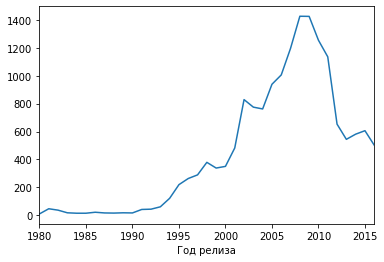

In [146]:
df.groupby('year_of_release')['name'].count().plot();
plt.xlabel('Год релиза');

<font color=brown>Очень напрашивается график!

Рассмотрим ка менялись продажи по платформам.

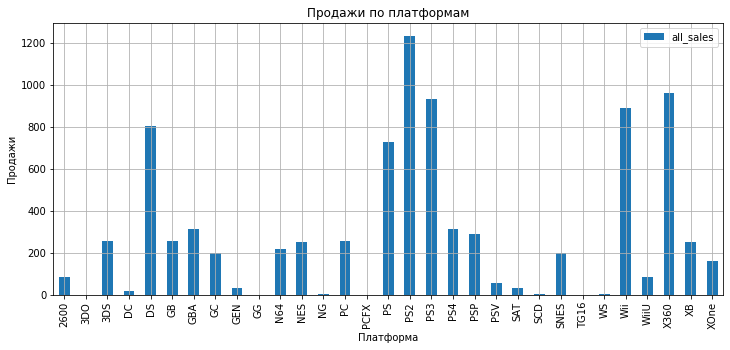

In [147]:
(df    
         .pivot_table(index='platform', values='all_sales', aggfunc='sum')
         .plot(kind='bar', grid=True, figsize=(12, 5), title='Продажи по платформам')
);
plt.xlabel('Платформа');
plt.ylabel('Продажи');

Определим лучшие 6 платформ по продажам за все время.

In [148]:
top6 = df.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by = 'all_sales', ascending = False).head(6)
top6

,all_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58


Построим графики распределения количества выпущенных игр по годам по платформам из топ6.

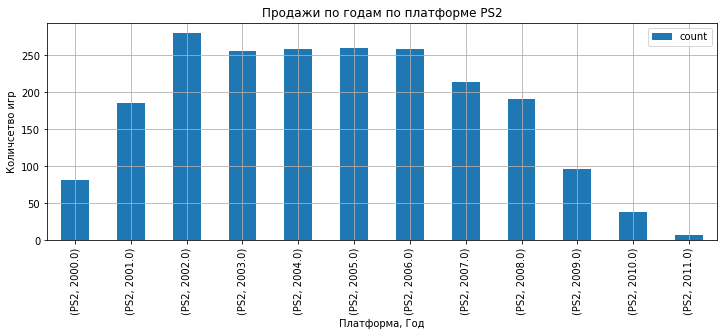

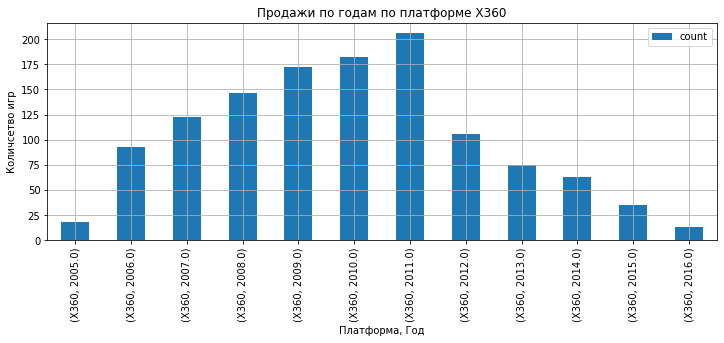

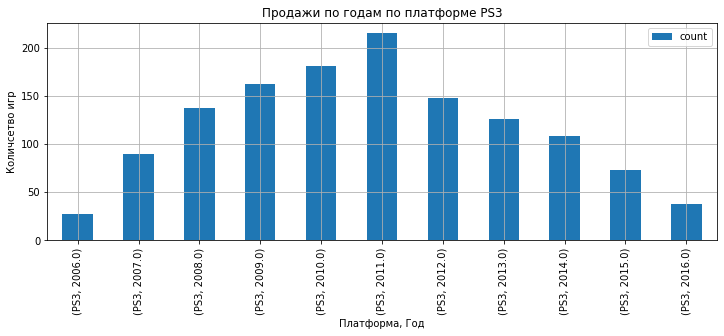

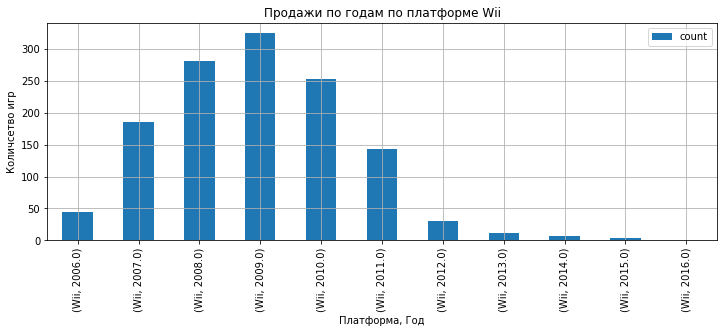

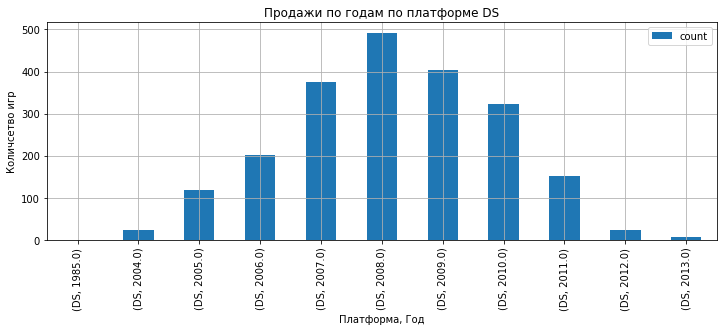

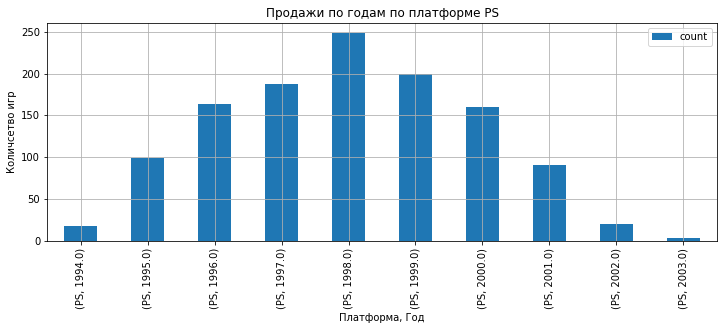

In [149]:
for name in top6.index:   
    df.groupby(['platform', 'year_of_release'])['name'].agg(['count']).query('platform == @name').plot(kind='bar', 
                                                                                                       grid=True, 
                                                                                                       figsize=(12, 4), 
                                                                                                       title=f'Продажи по годам по платформе {name}')  
    plt.xlabel('Платформа, Год');
    plt.ylabel('Количсетво игр');

<font color=green>Визуализации наглядны, цикл жизни прослеживается очетливо.

Глядя на распределения можно сделать вывод, что цикл жизни платформ длится от 5 до 10 лет, при этом не все года эквивалентны по кличеству выпущенных игр. В основном, в жизненном цикле по годам и количеству прослеживается нормальое распределение.

Также, мы видим, что не все платформы из топа к 2016 году сохраняют свою актуальность. Так же помним, что данные за 2016 год могут быть неполными.

На основании этого для дальнейшего исследования и построения рогноза на 2017 год предлагаем взять актуальный период в 5 лет, то есть все игры выпущенные начиная с 2011 года

<font color=green>В целом соглашусь. Хотя я бы еще пару лет накинул - на графиках видно, что в 11-м на рынке все еще доминируют платформы, практически потерявшие актуальность в 16-м. Например, X360. 

In [150]:
g = df.query('year_of_release > 2011')
g.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


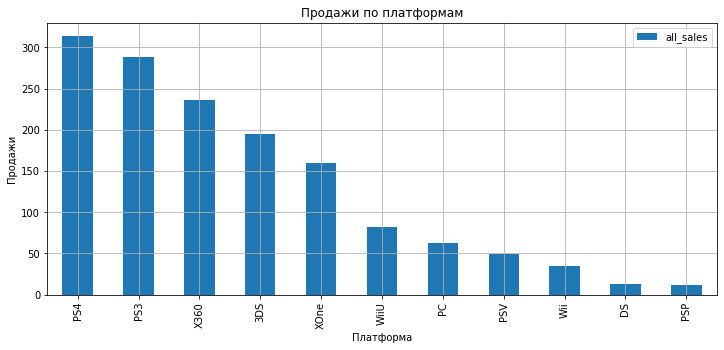

In [151]:
(g    
         .pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by = 'all_sales', ascending = False)
         .plot(kind='bar', grid=True, figsize=(12, 5), title='Продажи по платформам')
);
plt.xlabel('Платформа');
plt.ylabel('Продажи');

<font color=blue>Такие графики лучше выглядят упорядоченными.

In [152]:
top8 = g.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by = 'all_sales', ascending = False).head(8)
top8

,all_sales
platform,
PS4,314.14
PS3,288.79
X360,236.54
3DS,194.61
XOne,159.32
WiiU,82.19
PC,62.65
PSV,49.18


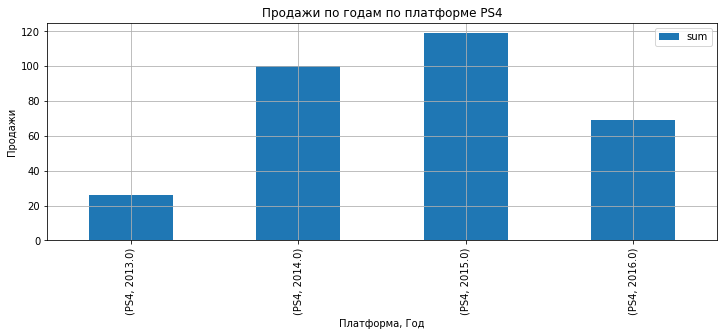

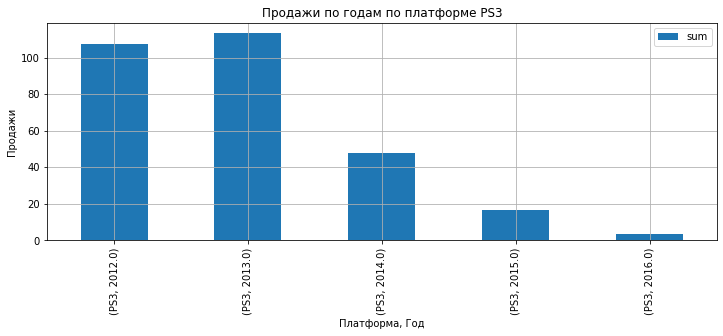

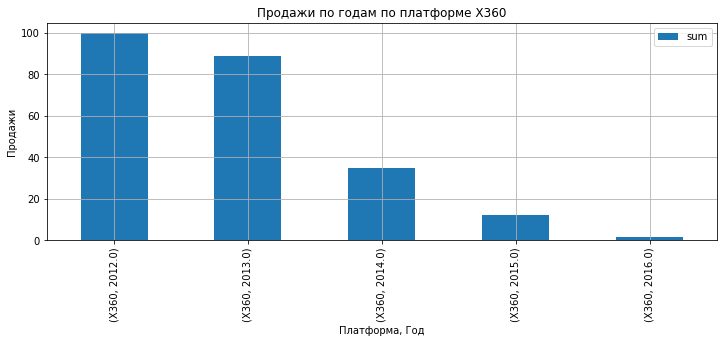

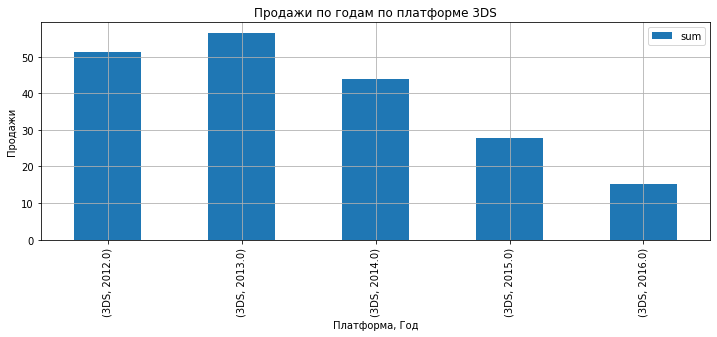

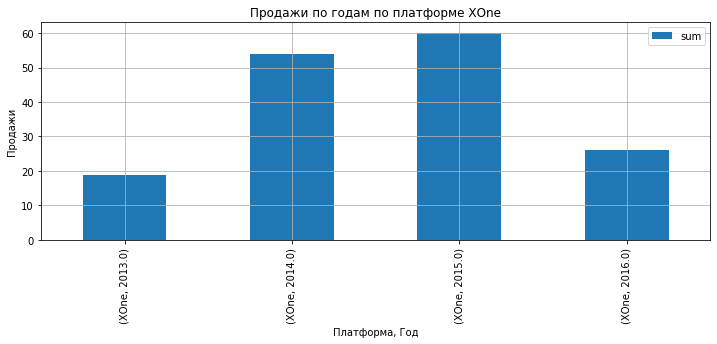

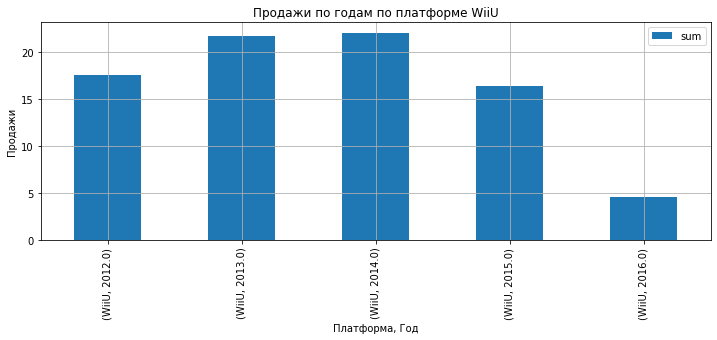

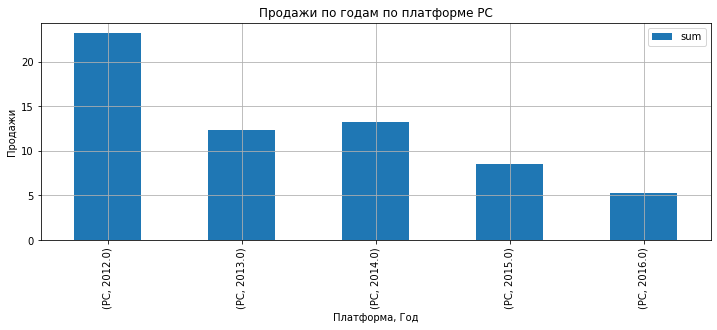

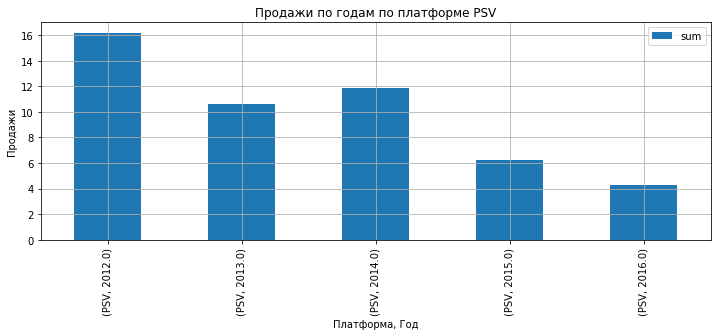

In [153]:
for name in top8.index:   
    g.groupby(['platform', 'year_of_release'])['all_sales'].agg(['sum']).query('platform == @name').plot(kind='bar', 
                                                                                                       grid=True, 
                                                                                                       figsize=(12, 4), 
                                                                                                       title=f'Продажи по годам по платформе {name}')  
    plt.xlabel('Платформа, Год');
    plt.ylabel('Продажи');

По графикам можно судить, что такие платформы как PS3, X360 уже отжили свое. Им на смену пришли PS4 и XOne, которые и являются наиболее перспективными для продаж в 2017 году. PC, 3DS еще сохраняют продажи, можно уделить им внимание. Но акцент лучше сделать именно на асортименте для PS4 и XOne.

<font color='green'>Перспективные платформы найдены, отлично.

Построим диаграммы размаха по платформам с данными о продажах.

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


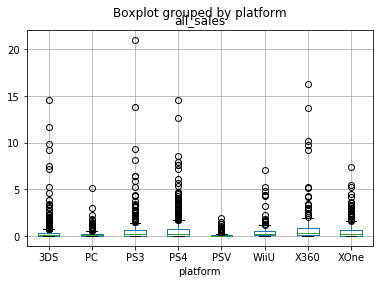

In [154]:
plot = g[g['platform'].isin(top8.index)].boxplot('all_sales', by='platform')

Глядя на диаграммы размаха, можно сделать вывод о разбросе дохода с реализации игр. По каждой платформе есть игры, которые продаются значительно лучше других. Можно назвать их выбросами, но мы будем считать их флагманами продаж, на которые следует обратить внимание)

<font color='green'>Хорошее замечание, в данном случае "выбросы" генерят огромную долю продаж, поэтому они важны.

----------------
Проверим, влияют ли на продажи рейтинги критиков и отзывы пользователей для примера возьмем PS4.

In [155]:
ps4 = g.query('platform == "PS4"')
ps4.sort_values(by = 'all_sales', ascending = False).head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


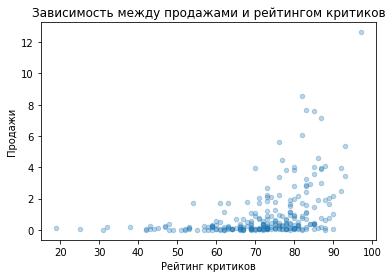

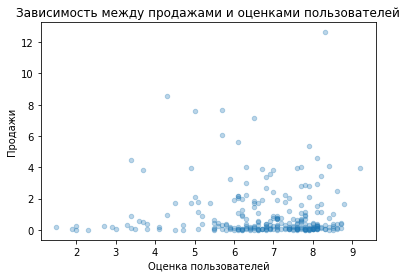

In [156]:
(ps4 
         .plot(x = 'critic_score', y = 'all_sales', kind = 'scatter', alpha = 0.3, 
          title='Зависимость между продажами и рейтингом критиков')
);
plt.ylabel('Продажи');
plt.xlabel('Рейтинг критиков');
(ps4 
         .plot(x = 'user_score', y = 'all_sales', kind = 'scatter', alpha = 0.3, 
          title='Зависимость между продажами и оценками пользователей')
);
plt.ylabel('Продажи');
plt.xlabel('Оценка пользователей');

In [157]:
print('Корреляция между продажами и рейтингом критиков PS4', ps4['all_sales'].corr(ps4['critic_score']).round(2))
print('Корреляция между продажами и оценками пользователей PS4', ps4['all_sales'].corr(ps4['user_score']).round(2))

Корреляция между продажами и рейтингом критиков PS4 0.41
Корреляция между продажами и оценками пользователей PS4 -0.03


На примере платформы PS4 можно сказать, что между продажами и рейтингом критиков имеется средняя положтельная корреляция. Между оценками поьзователей и продажами корреляция практически отсутствует. Возможно мы взяли не сильно большую выборку (помним, что ранее мы заменили много значений на Nan).

<font color='green'>Действительно, похоже, рейтинг пользователей совсем не влияет на продажи.

Проверим корреляцию вне зависимости от платформы.

In [158]:
print('Корреляция между продажами и рейтингом критиков', g['all_sales'].corr(g['critic_score']).round(2))
print('Корреляция между продажами и оценками пользователей', g['all_sales'].corr(g['user_score']).round(2))

Корреляция между продажами и рейтингом критиков 0.31
Корреляция между продажами и оценками пользователей 0.0


Зависимость подтверждена и на других платформах. Видимо критики лучше разбираются в играх с коммерческой стороны, можно к ним прислушиваться.

<font color='green'>Итак, графики зависимости построены, взаимосвязь оценок и продаж установлена успешно. Действительно, на продажи явно влияют лишь оценки критиков.  Ты отлично понимаешь, как устанавливать и интерпретировать корреляцию параметров.

<font color='blue'>Необязательный челендж: пройтись циклом по другим популярным платформам и проверить есть ли среди них такие, в которых оценки пользователей хоть как-то влияют на продажи.

In [159]:
for name in top8.index:   
    pl = g.query('platform == @name')
    print('==============',name,'===================')
    print('Корреляция между продажами и рейтингом критиков', pl['all_sales'].corr(g['critic_score']).round(2))
    print('Корреляция между продажами и оценками пользователей', pl['all_sales'].corr(g['user_score']).round(2))

============== PS4 ===================
Корреляция между продажами и рейтингом критиков 0.41
Корреляция между продажами и оценками пользователей -0.03
============== PS3 ===================
Корреляция между продажами и рейтингом критиков 0.33
Корреляция между продажами и оценками пользователей -0.01
============== X360 ===================
Корреляция между продажами и рейтингом критиков 0.36
Корреляция между продажами и оценками пользователей 0.01
============== 3DS ===================
Корреляция между продажами и рейтингом критиков 0.32
Корреляция между продажами и оценками пользователей 0.2
============== XOne ===================
Корреляция между продажами и рейтингом критиков 0.42
Корреляция между продажами и оценками пользователей -0.07
============== WiiU ===================
Корреляция между продажами и рейтингом критиков 0.35
Корреляция между продажами и оценками пользователей 0.4
============== PC ===================
Корреляция между продажами и рейтингом критиков 0.24
Корреляция 

<font color='purple'>Слабая корреляция есть только у платформы 3DS.

<b>UPD: <font color='green'>Отличная автоматизация. Еще у WiiU пользователи даже обошли критиков.

---------------------------

Рассмотрим игры в разрезе жанров.

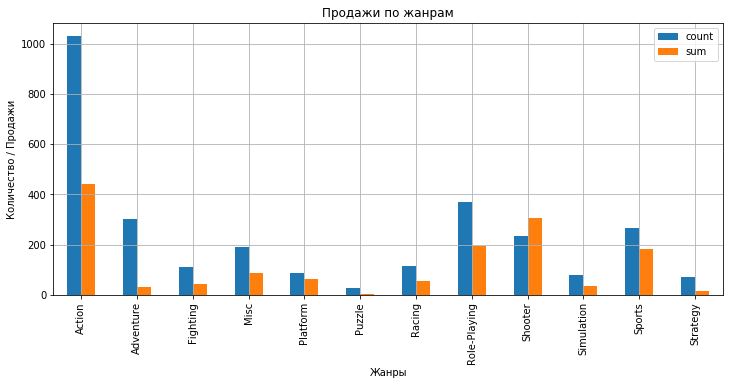

In [160]:
(g    
         .pivot_table(index='genre', values='all_sales', aggfunc={'sum','count'})
         .plot(kind='bar', grid=True, figsize=(12, 5), title='Продажи по жанрам')
);
plt.xlabel('Жанры');
plt.ylabel('Количество / Продажи');

По количеству выпускаемых игр и по сумме сборов есть явный лидер - жанр экшн.

На втором месте идут шутеры, далее ролевые и спортивные игры.

<font color='blue'>А еще можно взглянуть на средний чек по жанрам (функция аггрегации mean). 

<font color='green'>В целом же, здесь снова все верно. Выводы понятны и аргументированы.

### Шаг 4. Портрет пользователя каждого региона. <a name="p4"></a>

Проанализируем продажи по платформам и регионам.

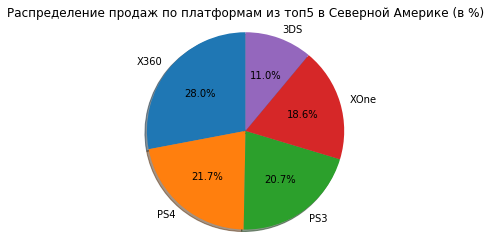

In [161]:
na_top = g.pivot_table(index='platform', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending = False).head(5)
fig1, ax1 = plt.subplots()
ax1.pie(na_top.na_sales,  labels=na_top.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Распределение продаж по платформам из топ5 в Северной Америке (в %)');

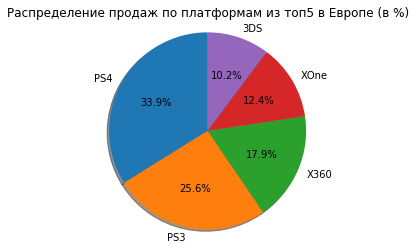

In [162]:
eu_top = g.pivot_table(index='platform', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending = False).head(5)
fig1, ax1 = plt.subplots()
ax1.pie(eu_top.eu_sales,  labels=eu_top.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Распределение продаж по платформам из топ5 в Европе (в %)');

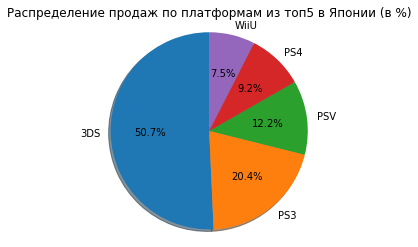

In [163]:
jp_top = g.pivot_table(index='platform', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending = False).head(5)
fig1, ax1 = plt.subplots()
ax1.pie(jp_top.jp_sales,  labels=jp_top.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Распределение продаж по платформам из топ5 в Японии (в %)');

Воу! Топы по платформам между регионами сильно отличаются! 

В Японии так вообще свой лидер 3DS, с гигантской долей в 50, который в Северной Америке и Европе только на 5ом месте. Да и   целом в Японии юзеры используют в основном японские консоли. Xbox за пределами топа.

В Европе превалируют PS3 и PS4 c долями 34 и 25 процентов. Далее идут X360 и XOne.

В Америке результаты плотнее: X360 лидер - 28%, далее PS4 и PS3 - 21 и 20%.

<font color='green'>Отличные таблички и выводы.

<s><font color='red'>Однако в этом разделе, где все крутится вокруг долей рынка, визуализации просто незаменмы. Могу предложить попробоваить круговые или столбчатые диаграммы, но можешь сделать что-то еще, на свой вкус.

<font color='purple'> Добавила)

<b>UPD: <font color='green'>Теперь расклад по регионам - как на ладони, отлично!

---------------------------------------
Проанализируем продажи по жанрам и регионам.

In [176]:
na_top_genre = g.pivot_table(index='genre', values='na_sales', aggfunc='sum').sort_values(by = 'na_sales', ascending = False).head(5)
na_top_genre['pcnt'] = na_top_genre['na_sales'] / g['na_sales'].sum()
na_top_genre

,na_sales,pcnt
genre,,
Action,177.84,0.300929
Shooter,144.77,0.244970
Sports,81.53,0.137960
Role-Playing,64.00,0.108297
Misc,38.19,0.064623


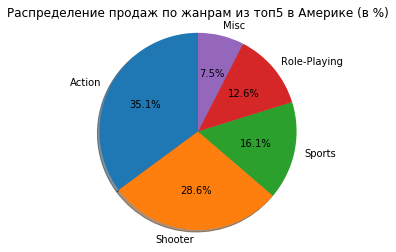

In [179]:
fig1, ax1 = plt.subplots()
ax1.pie(na_top_genre.na_sales,  labels=na_top_genre.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Распределение продаж по жанрам из топ5 в Америке (в %)');

In [173]:
eu_top_genre = g.pivot_table(index='genre', values='eu_sales', aggfunc='sum').sort_values(by = 'eu_sales', ascending = False).head(5)
eu_top_genre['pcnt'] = eu_top_genre['eu_sales'] / g['eu_sales'].sum()
eu_top_genre

,eu_sales,pcnt
genre,,
Action,159.34,0.314392
Shooter,113.47,0.223886
Sports,69.09,0.136321
Role-Playing,48.53,0.095754
Racing,27.29,0.053846


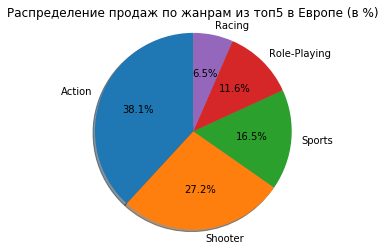

In [178]:
fig1, ax1 = plt.subplots()
ax1.pie(eu_top_genre.eu_sales,  labels=eu_top_genre.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Распределение продаж по жанрам из топ5 в Европе (в %)');

In [166]:
jp_top_genre = g.pivot_table(index='genre', values='jp_sales', aggfunc='sum').sort_values(by = 'jp_sales', ascending = False).head(5)
jp_top_genre['pcnt'] = jp_top_genre['jp_sales'] / g['jp_sales'].sum()
jp_top_genre

,jp_sales,pcnt
genre,,
Role-Playing,65.44,0.339807
Action,52.80,0.274172
Misc,12.86,0.066777
Simulation,10.41,0.054055
Fighting,9.44,0.049019


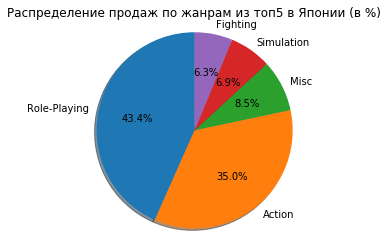

In [170]:
fig1, ax1 = plt.subplots()
ax1.pie(jp_top_genre.jp_sales,  labels=jp_top_genre.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.title('Распределение продаж по жанрам из топ5 в Японии (в %)');

В разрезе продаж по жанрам снова выделяется Япония в которой пользователи отдают предпочтение РПГ. В Европе и Америке Экшены и Шутеры занимают первые позиции.

----------------------
Посмотрим на продажи в разрезе рейтинга ESRB.

In [167]:
rt = g.pivot_table(index='rating', values=('na_sales','eu_sales','jp_sales'), aggfunc='sum')
rt['pcnt_na'] = rt['na_sales'] / rt['na_sales'].sum()
rt['pcnt_eu'] = rt['eu_sales'] / rt['eu_sales'].sum()
rt['pcnt_jp'] = rt['jp_sales'] / rt['jp_sales'].sum()
rt.sort_values(by = 'pcnt_na', ascending = False)

,eu_sales,jp_sales,na_sales,pcnt_na,pcnt_eu,pcnt_jp
rating,,,,,,
M,193.96,21.20,231.57,0.391847,0.382700,0.110084
E,113.03,28.33,114.37,0.193529,0.223018,0.147108
no_rating,91.50,108.84,103.31,0.174814,0.180537,0.565168
E10+,55.37,8.19,75.70,0.128094,0.109250,0.042528
T,52.96,26.02,66.02,0.111715,0.104495,0.135113


<font color='purple'>Видим, что большой пласт игр в данных без рейтинга. Особенно это влияет на распределение продаж в Японии.

<s><font color='red'>Обрати внимание - ты не учитываешь игры без рейтинга. В результате огромная часть игр просто выпадает из анализа. Давай найдем способ учесть их при группировке значений по рейтингу.

В Европе и Америке лучше всего продаются игры с рейтинком М - для взрослых. В Японии больше популярны игры с рейтингом E и Т (для всех и для подростков). 

Таким образом мы выяснили, что портрет пользователей Европы и Америки схож, а вот Япония сильно отличается по всем параметрам.

<font color='green'>Итак, в целом этот шаг также выполнен отлично: компактные таблицы, лаконичный код, четкие и верные выводы. Заказчику будет легко понять, на какие платформы/жанры/рейтинги делать упор.  
    Но давай подкрепим наши выводы наглядными визуализациями. Ну и посмотрим, где там не проставлен рейтинг.

### Шаг 5. Проверка гипотез. <a name="p5"></a>

***Гипотеза 1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.***

Имеем две генеральных совокупности: по платформе Xbox One и PC.

Выдвенем нулевую гипотезу о равенсте пользовательских рейтингов по двум платформам.

Тогда альтернатиной гипотизой будем считать мнение, что средние пользовательские рейтинги платформ Xbox One и PC отличаются.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind(array1, array2). 



Сначала создадим срезы по платформам. Помним, что ранее мы пришли к выводу, что мы не будем заполнять Nan'ы из других значений и из среднего, но для рассчетов они нам помешают, поэтому мы их отбросим.

In [43]:
xone = g.query('platform == "XOne" and user_score != "Nan"')
pc = g.query('platform == "PC" and user_score != "Nan"')

In [44]:
print('Дисперсия по рейтингам Xbox One',np.var(xone['user_score'], ddof=1).round(2))
print('Дисперсия по рейтингам PC',np.var(pc['user_score'], ddof=1).round(2))

Дисперсия по рейтингам Xbox One 1.91
Дисперсия по рейтингам PC 2.77


Поскольку дисперсия отличается, предположим, что в equal_var нужно использовать параметр False. 

<font color='green'>Молодец, что не забываешь сравнить диперсии.

In [45]:
alpha = 0.05 

results = st.ttest_ind(
    xone['user_score'], 
    pc['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)  

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Таким образом мы не смогли опровергнуть нулевую гипотезу и не можем считать, что средние пользовательские рейтинги платформ Xbox One и PC разные.

Найдем средние рейтинги для лишнего подтверждения.

In [46]:
print('Средний рейтинг пользователей игр на Xone',xone['user_score'].mean().round(2))
print('Средний рейтинг пользователей игр на PC',pc['user_score'].mean().round(2))

Средний рейтинг пользователей игр на Xone 6.52
Средний рейтинг пользователей игр на PC 6.43


Действительно, рейтинги отличаются незначительно.

***Гипотеза 2: Средние пользовательские рейтинги жанров Action и Sports разные.***

Имеем две генеральных совокупности: по жанрам Action и Sports.

Выдвинем нулевую гипотезу о равенсте пользовательских рейтингов по двум жанрам.

Тогда альтернатиной гипотизой будем считать мнение, что средние пользовательские рейтинги жанров Action и Sports отличаются.

Чтобы проверить гипотезу о равенстве среднего двух генеральных совокупностей по взятым из них выборкам, применим метод scipy.stats.ttest_ind(array1, array2). 

In [47]:
action = g.query('genre == "Action" and user_score != "Nan"')
sports = g.query('genre == "Sports" and user_score != "Nan"')

In [48]:
print('Дисперсия по рейтингам Action',np.var(action['user_score'], ddof=1).round(2))
print('Дисперсия по рейтингам Sports',np.var(sports['user_score'], ddof=1).round(2))

Дисперсия по рейтингам Action 1.89
Дисперсия по рейтингам Sports 3.02


Поскольку дисперсия отличается, предположим, что в equal_var нужно использовать параметр False. 

In [49]:
alpha = 0.05 

results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'], equal_var = False)

print('p-значение: ', results.pvalue)  

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  4.24307776572644e-20
Отвергаем нулевую гипотезу


Получили ничтожно малое число и отвергли нулевую гипотизу.

Делаем вывод, что cредние пользовательские рейтинги жанров Action и Sports разные не только в нашей выборке.

Проверим среднюю выручку по выборке.

In [50]:
print('Средний рейтинг пользователей игр жанра Action',action['user_score'].mean().round(2))
print('Средний рейтинг пользователей игр жанра Sports',sports['user_score'].mean().round(2))

Средний рейтинг пользователей игр жанра Action 6.83
Средний рейтинг пользователей игр жанра Sports 5.46


Действительно, рейтинг отличается: пользователи чуть больше любят игры жанра Action.

<font color='green'>К статистическим тестам вопросов нет, гипотезы сформулированы и проверены верно. Выборки построены правильно. Сделаны хорошие выводы.  
   Ты видишь разницу между выборкой и генеральной совокупностью и четко понимаешь принцип проверки стат. гипотез.

### Шаг 6. Напишите общий вывод <a name="p6"></a>

В ходе исследования были проанализированы данные о продажах игр, оценки пользователей и экспертов, жанры и платформы до 2017 года.

Был проанализирован жизненный цикл платформ, который составил от 5 до 10 лет и на основании этого определен актуальный период для анализа с 2011 по 2016 год.

Была выдвинута гипотеза, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые. Гипотеза не была опровергнута. Также была выдвинута гипотеза, что средние пользовательские рейтинги жанров Action и Sports разные, что подтвердилось.

Обнаружено, что по каждой платформе есть свои флагманы продаж и акцент было бы разумно сделать именно на них. 

Сделан вывод, что пользовательский портрет отличается между регионами продаж. И игры и превалирующие платформы различны. Поэтому интернет-магазину (мы же подразумеваем, что он находится в России) рекомендомано ориентироваться на данные по Европейскому рынку. То есть среди платформ уделить большее внимание PS4, а среди игр - играм жанра Action и Sports.




<font color='green'>Очень обстоятельные выводы. Описаны все найденные в данных инсайты. Даны ответы на поставленные вопросы.

<font color='blue'>Итак, у тебя отличный сборный проект. Ты показываешь хорошее владение всем изучаемым в модуле материалом. Уверенно пользуешься pandas, умеешь очищать данные, строишь отличные наглядные визуализации. Делаешь четкие обоснованные выводы. К оформлению работы также претензий нет.  
 Однако немного "критики и предложений по улучшению проекта" у меня, как ты и просила, нашлось 😉 Уверен, тебе не составит труда с этим разобраться и довести работу до идеала. Буду ждать доработанный проект, успехов!

<font color='purple'>Спасибо, постаралась учесть замечания!

<b><font color='blue'>Хорошая доработка, принимаю проект. Поздравляю с окончанием модуля, впереди парсинг сайтов, работа с базами данных и еще много всего интересного, успехов!